In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph


In [3]:
class Agentstate(TypedDict):
    values:list[int]
    message:str
    result:str
    

In [4]:
def add_er(state:Agentstate):
    """this is the function adding the values of the person"""
    state['result'] = f"the addition of the numbers is: {sum(state['values'])} for the person {state['message']}"
    return state

In [5]:
graph = StateGraph(Agentstate)
graph.add_node("adder",add_er)
graph.set_entry_point("adder")
graph.set_finish_point("adder")
app = graph.compile()

In [6]:
app.invoke({"message":"kishan","values":[1,2,3,4]})  #i not pass the res variable so the langgraph put automatically None to res.

{'values': [1, 2, 3, 4],
 'message': 'kishan',
 'result': 'the addition of the numbers is: 10 for the person kishan'}

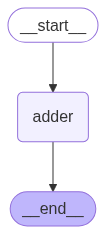

In [7]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
from functools import reduce

def add_er(state:Agentstate):
    """this is the function adding the values of the person"""

    state['result'] = f"the addition of the numbers is: {reduce(lambda x, y: x * y, state['values'])} for the person {state['message']}"
    return state


In [9]:
graph = StateGraph(Agentstate)
graph.add_node("operations",add_er)
graph.set_entry_point("operations")
graph.set_finish_point("operations")
app=graph.compile()


In [10]:
app.invoke({"message":"kishan",'values':[1,2,3]})

{'values': [1, 2, 3],
 'message': 'kishan',
 'result': 'the addition of the numbers is: 6 for the person kishan'}